# Juliaで複雑ネットワークを可視化

## 1. パッケージの追加

In [1]:
#using Pkg
#Pkg.add("GraphPlot")  # ネットワーク構造の表現
#Pkg.add("Graphs")     # ネットワーク可視化
#Pkg.add("Compose")    # グラフの保存（SVG）
#Pkg.add("Cairo")      # グラフ保存の追加機能（PNG, PDF）
#Pkg.add("Fontconfig") #     〃

## 2. Packageの読み込み

In [2]:
using GraphPlot
using Graphs
using Compose
using Cairo
using Fontconfig

## 3. サンプルグラフの表示

### (1) ワッツ・ストロガッツモデル

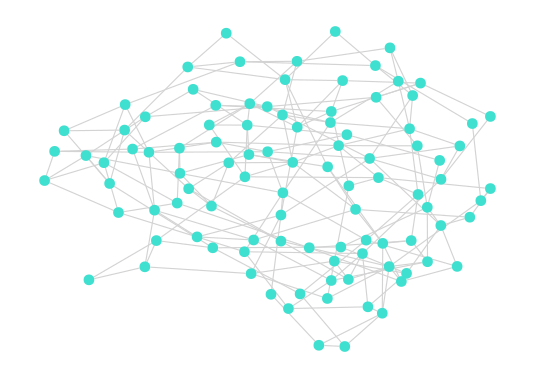

In [3]:
# ノード数=100,度数(隣接するノード数)=4,辺を張り替える確率=0.5
g = watts_strogatz(100,4,0.5)
fig = gplot(g)

#### PNGファイルに出力

In [4]:
Compose.draw(PNG("watts_strogatz_graph.png", 10cm, 10cm), fig) 

#### SVGファイルに出力

In [5]:
Compose.draw(SVG("watts_strogatz_graph.svg", 10cm, 10cm), fig) 

false

### (2)バラバシ・アルバートモデル

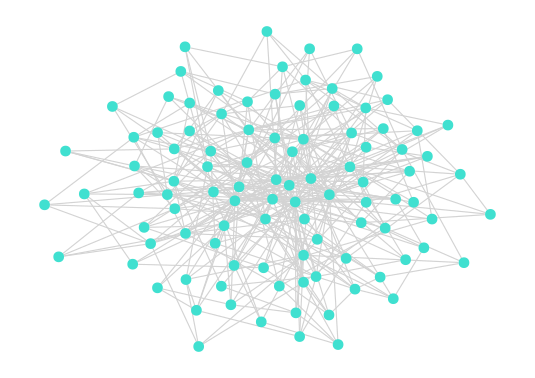

In [6]:
# ノード数=100, 初期ノード数=4
g = barabasi_albert(100, 4)
fig = gplot(g)

#### PNGファイルに出力

In [7]:
Compose.draw(PNG("barabasi_albert_graph.png", 10cm, 10cm), fig) 

## 4. グラフの自作

### (1)ノード３のグラフを作成し、すべてのノードを結合する

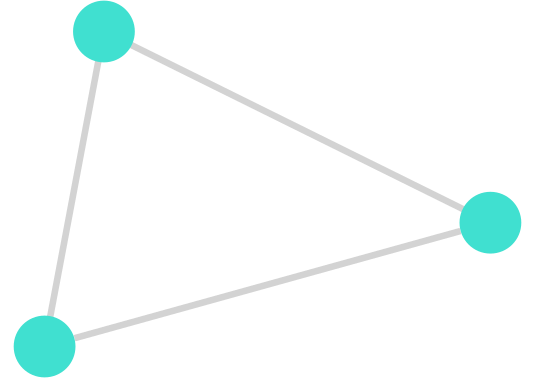

In [8]:
g = SimpleGraph(3)
add_edge!(g, 1, 2)
add_edge!(g, 2, 3)
add_edge!(g, 3, 1)
gplot(g)

#### ノードを追加し、3番のノードと結合

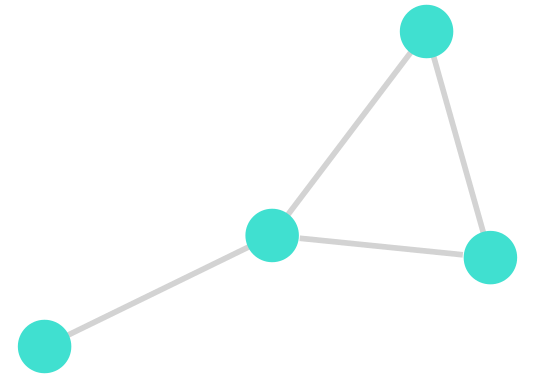

In [9]:
add_vertex!(g)
add_edge!(g, 3, 4)
gplot(g)

#### ノードに番号を表示

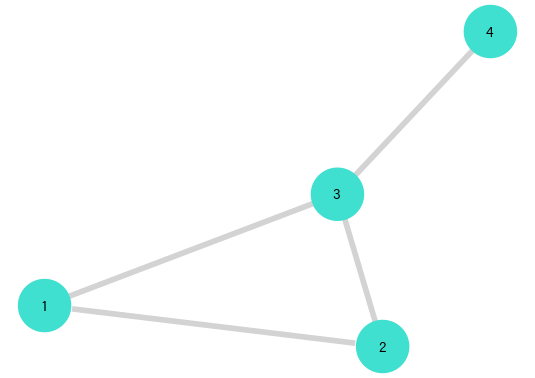

In [10]:
gplot(g, nodelabel=1:4)

### (2)ノード数10のグラフを作成し、データに基づいて結合する。また、指定されたラベルを表示する

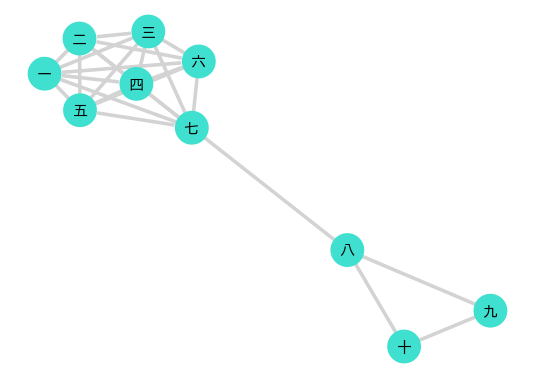

In [11]:
# ノードの数
count_vertices = 10
# 結合するノード
edges =
    [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
     (2, 3), (2, 4), (2, 5), (2, 6), (2, 7),
     (3, 4), (3, 5), (3, 6), (3, 7), 
     (4, 5), (4, 6), (4, 7),
     (5, 6), (5, 7),
     (6, 7),
     (7, 8),
     (8, 9), (8, 10),
     (9, 10)
    ]
# ノードに表示するラベル
nodelabel = ["一","二","三","四","五","六","七","八","九","十"]

g = SimpleGraph(count_vertices)
for (src, tgt) in edges
    add_edge!(g, src, tgt)
end
fig = gplot(g, nodelabel=nodelabel)

In [12]:
Compose.draw(PNG("node10_graph.png", 10cm, 10cm), fig) 